Script started.
Loading the dataset...
Loading and modifying the VGG16 model...
Starting SHAP analysis...


<Figure size 1440x720 with 0 Axes>

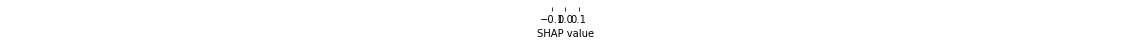

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SHAP analysis completed. Total time taken: 41.80 seconds


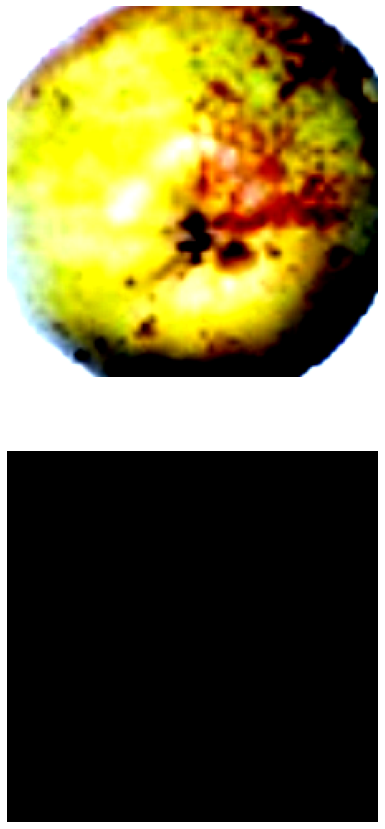

In [4]:
%matplotlib inline
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from torchvision.models import VGG16_Weights
import shap
import random
import matplotlib.pyplot as plt
import time
import matplotlib
import numpy as np

# Start the timer
start_time = time.time()
print("Script started.")

# Path to your images
image_path = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Training'

# Image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("Loading the dataset...")
# Load the dataset
dataset = datasets.ImageFolder(image_path, transform=transform)

# Selecting a subset of x images
subset_size = 1
subset_indices = random.sample(range(len(dataset)), subset_size)
subset_dataset = Subset(dataset, subset_indices)

# DataLoader for the subset
batch_size = 32
subset_data_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)

def replace_inplace_relu_with_standard(model):
    for name, module in model.named_children():
        if isinstance(module, torch.nn.ReLU):
            setattr(model, name, torch.nn.ReLU(inplace=False))
        elif len(list(module.children())) > 0:
            replace_inplace_relu_with_standard(module)

print("Loading and modifying the VGG16 model...")
# Load the VGG16 model
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

# Replace in-place ReLU with standard ReLU
replace_inplace_relu_with_standard(model)

# Ensure model is in evaluation mode
model.eval()

# Check if CUDA is available and use GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function for batch prediction
def batch_predict(images):
    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
    return torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()

print("Starting SHAP analysis...")
# Get a single batch of data
sample_images, _ = next(iter(subset_data_loader))

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, sample_images.to(device))

# Calculate SHAP values
shap_values = explainer.shap_values(sample_images.to(device))

plt.figure(figsize=(20, 10))

# Visualize the SHAP values for the first few predictions
shap.image_plot(shap_values, sample_images.numpy())

# End the timer and calculate the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"SHAP analysis completed. Total time taken: {total_time:.2f} seconds")

plt.show()

# Ensure that there is a batch of images and SHAP values to visualize
if len(sample_images) > 0 and len(shap_values) > 0:
    plt.figure(figsize=(20, 15))  # Increase the size of the figure

    for i in range(min(len(sample_images), 5)):  # Adjust the number of images you want to display
        plt.subplot(2, min(len(sample_images), 5), i + 1)
        plt.imshow(sample_images[i].numpy().transpose(1, 2, 0))
        plt.axis('off')

        plt.subplot(2, min(len(sample_images), 5), i + 1 + min(len(sample_images), 5))
        plt.imshow(shap_values[0][i].transpose(1, 2, 0))
        plt.axis('off')

    plt.show()
else:
    print("No data to display.") 


In [5]:
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [1]:
'''%matplotlib inline
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from torchvision.models import VGG16_Weights
import shap
import random
import matplotlib.pyplot as plt
import time

# Start the timer
start_time = time.time()
print("Script started.")

# Path to your images
image_path = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Training'

# Image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("Loading the dataset...")
# Load the dataset
dataset = datasets.ImageFolder(image_path, transform=transform)

# Selecting a subset of 2 images for quicker analysis
subset_size = 1
subset_indices = random.sample(range(len(dataset)), subset_size)
subset_dataset = Subset(dataset, subset_indices)

# DataLoader for the subset with multiple workers for parallel image loading
batch_size = subset_size  # Setting batch size equal to subset size for one-shot loading
num_workers = 4  # Adjust this based on your system's CPU cores
subset_data_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)




print("Loading the VGG16 model...")
# Load the VGG16 model
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
model.eval()

# Check if CUDA is available and use GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def replace_inplace_relu_with_standard(model):
    for name, module in model.named_children():
        if isinstance(module, torch.nn.ReLU) and module.inplace:
            setattr(model, name, torch.nn.ReLU(inplace=False))
        else:
            for child_name, child_module in module.named_children():
                if isinstance(child_module, torch.nn.ReLU) and child_module.inplace:
                    setattr(module, child_name, torch.nn.ReLU(inplace=False))
                replace_inplace_relu_with_standard(child_module)

# Apply the replacement function to the model
replace_inplace_relu_with_standard(model)

# Function for batch prediction that will be used by SHAP
def batch_predict(images):
    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
    return torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()

print("Starting SHAP analysis...")
# Get a single batch of data
sample_images, _ = next(iter(subset_data_loader))

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, sample_images.to(device))

# Calculate SHAP values
shap_values = explainer.shap_values(sample_images.to(device))

# Visualize the SHAP values for the predictions
shap.image_plot(shap_values, sample_images.numpy())

# End the timer and calculate the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"SHAP analysis completed. Total time taken: {total_time:.2f} seconds")

plt.show()'''


'%matplotlib inline\nimport torch\nfrom torch.utils.data import DataLoader, Subset\nfrom torchvision import datasets, transforms, models\nfrom torchvision.models import VGG16_Weights\nimport shap\nimport random\nimport matplotlib.pyplot as plt\nimport time\n\n# Start the timer\nstart_time = time.time()\nprint("Script started.")\n\n# Path to your images\nimage_path = \'/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Training\'\n\n# Image transformations\ntransform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n\nprint("Loading the dataset...")\n# Load the dataset\ndataset = datasets.ImageFolder(image_path, transform=transform)\n\n# Selecting a subset of 2 images for quicker analysis\nsubset_size = 1\nsubset_indices = random.sample(range(len(dataset)), subset_size)\nsubset_dataset = Subset(dataset, subset_indices)\n\n# Data

In [2]:
'''from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

# Define image size and path to the dataset
IMAGE_SIZE = [64, 64]  # keep the image size as (64, 64)
training_dir = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Training'
validation_dir = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Test'

# Load the VGG16 model pre-trained on ImageNet data
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of VGG16 model since they are already trained
for layer in vgg.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = Flatten()(vgg.output)
predictions = Dense(num_classes, activation='softmax')(x)  # assuming num_classes is the number of fruit classes

# Create the full model
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

# Prepare data loaders
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # This should be the number of batches per epoch (total images/batch size)
    epochs=10,           # Number of epochs to train for
    validation_data=valid_generator,
    validation_steps=50  # This should be number of batches in validation set
)
'''

"from keras.applications.vgg16 import VGG16\nfrom keras.models import Model\nfrom keras.layers import Flatten, Dense\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.applications.vgg16 import preprocess_input\n\n# Define image size and path to the dataset\nIMAGE_SIZE = [64, 64]  # keep the image size as (64, 64)\ntraining_dir = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Training'\nvalidation_dir = '/home/jigyas/Github/SHAP_Project/fruits-360_dataset/fruits-360/Test'\n\n# Load the VGG16 model pre-trained on ImageNet data\nvgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)\n\n# Freeze the layers of VGG16 model since they are already trained\nfor layer in vgg.layers:\n    layer.trainable = False\n\n# Add custom layers on top of VGG16\nx = Flatten()(vgg.output)\npredictions = Dense(num_classes, activation='softmax')(x)  # assuming num_classes is the number of fruit classes\n\n# Create the full model\nmodel = Model(inpu